In [53]:
# import packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
import umap

In [54]:
"""The script reproduces Fig 3 of the manuscript"""




# Import data
tsetse_data = pd.read_csv("../data/raw/TseTse_finaldatasetclean.csv")

# rename columns and replace labels
tsetse_data.rename(
    columns={"Cat1": "Plate", "Cat3": "Sex", "Cat4": "Age", "Cat5": "Tissue"},
    inplace=True,
)

tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("T", "Thorax")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("H", "Head")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("A", "Abdomen")

# copy data and extract descriptos for slicing
tsetse_data_copy = tsetse_data.copy()
dList = ["Plate", "Sex", "Age", "ID.1", "Tissue", "ID"]
descriptorsDF = tsetse_data_copy[dList]

# Sorting females from each tissue
tsetse_females_thorax = tsetse_data_copy.loc[
    (descriptorsDF["Sex"] == "f") & (descriptorsDF["Tissue"] == "Thorax")
]
tsetse_females_head = tsetse_data_copy.loc[
    (descriptorsDF["Sex"] == "f") & (descriptorsDF["Tissue"] == "Head")
]
tsetse_females_abdomen = tsetse_data_copy.loc[
    (descriptorsDF["Sex"] == "f") & (descriptorsDF["Tissue"] == "Abdomen")
]

# make copy of the data
tsetse_females_thorax_copy = tsetse_females_thorax.copy()
tsetse_females_head_copy = tsetse_females_head.copy()
tsetse_females_abdomen_copy = tsetse_females_abdomen.copy()


# create descriptors and drop from the main data sets
dList = ["Plate", "Sex", "Age", "ID.1", "Tissue", "ID"]

descriptorsDF_thorax = tsetse_females_thorax[dList]
tsetse_females_thorax_copy.drop(dList, axis=1, inplace=True)

descriptorsDF_head = tsetse_females_head_copy[dList]
tsetse_females_head_copy.drop(dList, axis=1, inplace=True)

# extract wavenumbers to plot
waveNumslist = tsetse_females_thorax_copy.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]


y_labels_head = descriptorsDF_head["Age"]
y_labels_thorax = descriptorsDF_thorax["Age"]


# sorting males
tsetse_males_thorax = tsetse_data_copy.loc[
    (descriptorsDF["Sex"] == "m") & (descriptorsDF["Tissue"] == "Thorax")
]

tsetse_males_head = tsetse_data_copy.loc[
    (descriptorsDF["Sex"] == "m") & (descriptorsDF["Tissue"] == "Head")
]

tsetse_males_thorax_copy = tsetse_males_thorax.copy()
tsetse_males_head_copy = tsetse_males_head.copy()

dList = ["Plate", "Sex", "Age", "ID.1", "Tissue", "ID"]
descriptorsDF_thorax_males = tsetse_males_thorax[dList]
tsetse_males_thorax_copy.drop(dList, axis=1, inplace=True)


descriptorsDF_head_males = tsetse_males_head_copy[dList]
tsetse_males_head_copy.drop(dList, axis=1, inplace=True)


# UMAP
# females head
reducer = umap.UMAP(n_neighbors=30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_females_head_copy)
embedding_head = reducer.fit_transform(features_scaled)

# Females thorax
reducer = umap.UMAP(n_neighbors=30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_females_thorax_copy)
embedding_thorax = reducer.fit_transform(features_scaled)


# males head
reducer = umap.UMAP(n_neighbors=30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_males_head_copy)
embedding_head_male = reducer.fit_transform(features_scaled)

# males thorax
reducer = umap.UMAP(n_neighbors=30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_males_thorax_copy)
embedding_thorax_male = reducer.fit_transform(features_scaled)


# remove 3 days old for proper clustering between males and females
tsetse_data_sameages = tsetse_data[(tsetse_data["Age"] != "3d")]
tsetse_data_sameages_copy = tsetse_data_sameages.copy()

dList = ["Plate", "Sex", "Age", "ID.1", "Tissue", "ID"]
descriptorsDF_sameage = tsetse_data_sameages_copy[dList]
tsetse_data_sameages_copy.drop(dList, axis=1, inplace=True)

tsetse_head = tsetse_data_sameages_copy[(descriptorsDF_sameage["Tissue"] == "Head")]
tsetse_thorax = tsetse_data_sameages_copy[(descriptorsDF_sameage["Tissue"] == "Thorax")]


# UMAP
# head both sexes
reducer = umap.UMAP(n_neighbors=30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_head)
embedding_head_sex = reducer.fit_transform(features_scaled)

# thorax both sexes
reducer = umap.UMAP(n_neighbors=30, transform_seed=123, min_dist=0.0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_thorax)
embedding_thorax_sex = reducer.fit_transform(features_scaled)




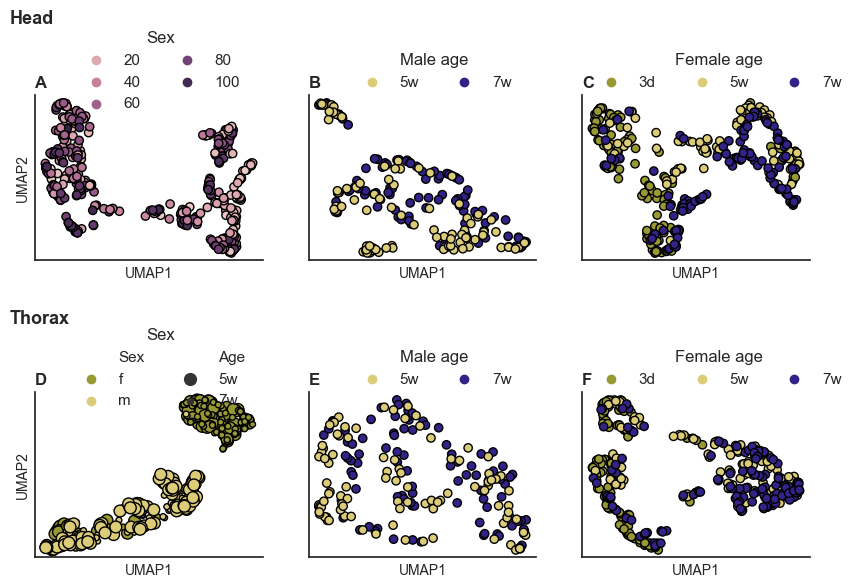

In [55]:
# Plot
rc={'font.size': 12,
    "font.family":"Arial",
    "axes.labelsize":10,
    'xtick.labelsize':10,
    'ytick.labelsize':10}

sn.set_style("ticks")
sn.set_context('notebook', rc=rc)

colorpal = ["#999933", "#DDCC77", "#332288"]
colorpal2 = ["#DDCC77", "#332288"]



colorsex = ["#88CCEE", "#882255"]
markpal = ["X", "o", "s"]
sn.set_palette(sn.color_palette(colorpal))

fig, ((ax, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 6))

plt.subplots_adjust(hspace=0.8)

# MALES AGE

sn.scatterplot(
    x=embedding_head_male[:, 0],
    y=embedding_head_male[:, 1],
    hue=descriptorsDF_head_males["Age"],
    hue_order=["5w", "7w"],
    alpha=1,
    palette=colorpal2,
    legend=True,
    ax=ax2,
    linewidth=1,
    edgecolor='k'
)

sn.scatterplot(
    x=embedding_thorax_male[:, 0],
    y=embedding_thorax_male[:, 1],
    hue=descriptorsDF_thorax_males["Age"],
    hue_order=["5w", "7w"],
    palette=colorpal2,
    alpha=1,
    legend=True,
    ax=ax5,
    linewidth=1,
    edgecolor='k'
)

# FEMALES AGE
# head
sn.scatterplot(
    x=embedding_head[:, 0],
    y=embedding_head[:, 1],
    alpha=1,
    hue=descriptorsDF_head["Age"],
    ax=ax3,
    legend=True,
    linewidth=1,
    edgecolor='k'
)


# thorax
sn.scatterplot(
    x=embedding_thorax[:, 0],
    y=embedding_thorax[:, 1],
    alpha=1,
    hue=descriptorsDF_thorax["Age"],
    markers=markpal,
    legend=True,
    ax=ax6,
    linewidth=1,
    edgecolor='k'
)


# SEX

sn.scatterplot(
    x=embedding_head_sex[:, 0],
    y=embedding_head_sex[:, 1],
    hue=descriptorsDF_sameage[descriptorsDF_sameage["Tissue"] == "Head"]["ID"],
    alpha=1,
    ax=ax,
    linewidth=1,
    edgecolor='k'
)


sn.scatterplot(
    x=embedding_thorax_sex[:, 0],
    y=embedding_thorax_sex[:, 1],
    hue=descriptorsDF_sameage[descriptorsDF_sameage["Tissue"] == "Thorax"]["Sex"],
    size = descriptorsDF_sameage[descriptorsDF_sameage["Tissue"] == "Thorax"]["Age"],
    alpha=1,
    legend=True,
    ax=ax4,
    linewidth=1,
    edgecolor='k'
)


ax.legend(
    ncol=2, bbox_to_anchor=(0.05, 1.1, 1, 0.1), loc="center", frameon=False, title="Sex"
)
ax2.legend(
    ncol=2,
    bbox_to_anchor=(0.05, 1.1, 1, 0.1),
    loc="center",
    frameon=False,
    title="Male age",
)
ax3.legend(
    ncol=3,
    bbox_to_anchor=(0.10, 1.1, 1, 0.1),
    loc="center",
    frameon=False,
    title="Female age",
)

ax4.legend(
    ncol=2, bbox_to_anchor=(0.05, 1.1, 1, 0.1), loc="center", frameon=False, title="Sex"
)
ax5.legend(
    ncol=2,
    bbox_to_anchor=(0.05, 1.1, 1, 0.1),
    loc="center",
    frameon=False,
    title="Male age",
)
ax6.legend(
    ncol=3,
    bbox_to_anchor=(0.10, 1.1, 1, 0.1),
    loc="center",
    frameon=False,
    title="Female age",
)

fig.text(0.1, 1, s="Head", fontsize=13, fontweight="bold")
fig.text(0.1, 0.5, s="Thorax", fontsize=13, fontweight="bold")

ax.set_ylabel("UMAP2")
ax4.set_ylabel("UMAP2")

ax4.set_xlabel("UMAP1")
ax5.set_xlabel("UMAP1")
ax6.set_xlabel("UMAP1")

ax.set_xlabel("UMAP1")
ax2.set_xlabel("UMAP1")
ax3.set_xlabel("UMAP1")

# ax3.legend( bbox_to_anchor=(0.5, 0.05, 0.3, 0.1),ncols=3,frameon=False)

labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, loc="left", fontsize=12, fontweight="bold")
    a.tick_params(left = False , labelleft = False , labelbottom = False, bottom = False) 

sn.despine()


#plt.savefig("./results/plots/Fig3.png", dpi=300, bbox_inches="tight")

In [56]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
colorpal = ["#999933", "#DDCC77", "#332288"]

# Import data
tsetse_data = pd.read_csv("../data/raw/TseTse_finaldatasetclean.csv")


# rename columns and replace labels
tsetse_data.rename(
    columns={"Cat1": "Plate", "Cat3": "Sex", "Cat4": "Age", "Cat5": "Tissue"},
    inplace=True,
)

tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("T", "Thorax")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("H", "Head")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("A", "Abdomen")


# copy data and sort by bodyparts
tsetse_data_copy = tsetse_data.copy()

tsetse_females_thorax = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Thorax")
]

tsetse_females_head = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Head")
]

tsetse_females_abdomen = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Abdomen")
]


tsetse_females_thorax_copy = tsetse_females_thorax.copy()
tsetse_females_head_copy = tsetse_females_head.copy()

# select the region 1800 - 900
tsetse_data_copy_onlywvns = tsetse_data_copy.loc[:, "4000":"402"]

# extract abdomen data for example
abdomen = pd.read_excel("../data/processed/abdomen_dataexample.xlsx")
abdomen_x = abdomen.loc[:, 4000:402]

# create wavenumbers
waveNumslist = abdomen_x.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]

# create second list of wavenumbers
waveNumslist2 = tsetse_data_copy_onlywvns.columns.values.tolist()
wavenumbers2 = [int(x) for x in waveNumslist2]

# PCA
pca = PCA(n_components=2)
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(tsetse_data_copy_onlywvns)
X_pca = pca.fit_transform(tsetse_data_copy_onlywvns)



Text(1, 0.66, 'Abdomen')

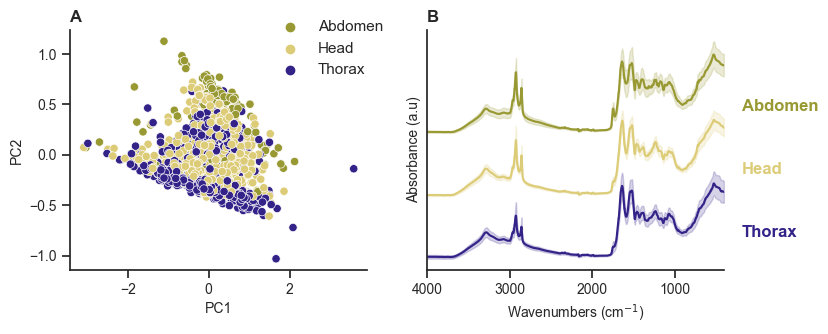

In [64]:
# Plot


plt.rcParams["font.size"] = 12
sn.set_style("ticks")
sn.set_palette(sn.color_palette(colorpal))

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(7.5, 3.5), tight_layout=True)
sn.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=tsetse_data_copy["Tissue"],
    ax=ax,
    legend=True
)

ax.legend(frameon=False,
        loc='upper right',
        bbox_to_anchor=(1.1, 1.1),)
sn.despine(ax=ax)

ax2.plot(wavenumbers2, np.mean(tsetse_females_head_copy.loc[:, "4000":"402"], axis=0)+0.25,color='#DDCC77')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"], axis=0)+0.25,
                 y2=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0)+0.25 + np.std(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0), alpha=0.2, color='#DDCC77')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"], axis=0)+0.25,
                 y2=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0)+0.25 - np.std(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0), alpha=0.2,color='#DDCC77')


ax2.plot(wavenumbers2, np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"], axis=0),color='#332288',label='thorax')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0) + np.std(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0), alpha=0.2,color='#332288')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0) - np.std(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0), alpha=0.2,color='#332288')


ax2.plot(wavenumbers2, np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"], axis=0)+0.5,color='#999933',label='Abdomen')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"], axis=0)+0.5,
                 y2=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0)+0.5 + np.std(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0), alpha=0.2, color='#999933')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"], axis=0)+0.5,
                 y2=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0)+0.5 - np.std(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0), alpha=0.2, color='#999933')

sn.despine(ax=ax2)

ax2.set_xlim(4000, 400)
ax2.set_yticks([])
ax2.set_ylabel("Absorbance (a.u)")
ax2.set_xlabel("Wavenumbers (cm$^{-1}$)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")


labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, y=1, loc="left", fontsize=12, fontweight="bold")


fig.text(x=1,y=0.48,s="Head",color='#DDCC77',fontweight='bold')
fig.text(x=1,y=0.30,s="Thorax",color='#332288',fontweight='bold')
fig.text(x=1,y=0.66,s="Abdomen",color='#999933', fontweight='bold')
#fig.text(x=1,y=0.45,s="Abdomen #2",color='#999933', fontweight='bold')
#fig.text(x=1,y=0.26,s="Abdomen #3",color='#999933', fontweight='bold')


#fig.savefig("./results/plots/Fig2.png", dpi=300, bbox_inches="tight")


In [88]:
colorpal = ["#999933", "#DDCC77", "#332288"]

# Import data
tsetse_data = pd.read_csv("../data/raw/TseTse_finaldatasetclean.csv")


# rename columns and replace labels
tsetse_data.rename(
    columns={"Cat1": "Plate", "Cat3": "Sex", "Cat4": "Age", "Cat5": "Tissue"},
    inplace=True,
)

tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("T", "Thorax")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("H", "Head")
tsetse_data["Tissue"] = tsetse_data["Tissue"].str.replace("A", "Abdomen")


# copy data and sort by bodyparts
tsetse_data_copy = tsetse_data.copy()

tsetse_females_thorax = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Thorax")
]

tsetse_females_head = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Head")
]

tsetse_females_abdomen = tsetse_data_copy.loc[
    (tsetse_data_copy["Sex"] == "f") & (tsetse_data_copy["Tissue"] == "Abdomen")
]


tsetse_females_thorax_copy = tsetse_females_thorax.copy()
tsetse_females_head_copy = tsetse_females_head.copy()

# select the region 1800 - 900
tsetse_data_copy_onlywvns = tsetse_data_copy.loc[:, "1800":"900"]
tse_for_wvn = tsetse_females_head_copy.loc[:, "4000":"402"]

# create second list of wavenumbers
waveNumslist2 = tse_for_wvn.columns.values.tolist()
wavenumbers2 = [int(x) for x in waveNumslist2]



# UMAP
reducer = umap.UMAP(n_neighbors=200, transform_seed=124, min_dist=0.1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(tsetse_data_copy_onlywvns)
embedding_head = reducer.fit_transform(features_scaled)

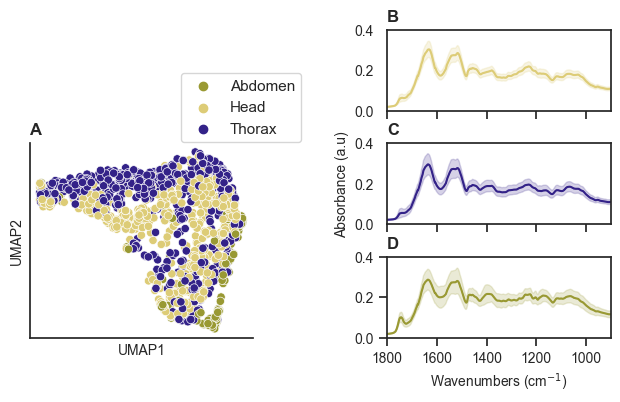

In [110]:

plt.rcParams["font.size"] = 12
sn.set_style("ticks")
sn.set_palette(sn.color_palette(colorpal))

colorpal = ["#999933", "#DDCC77", "#332288"]

fig = plt.figure(layout=None, figsize=(7.5, 4))
gs = fig.add_gridspec(nrows=3, ncols=2, hspace=0.4, wspace=0.6)

ax0 = fig.add_subplot(gs[1:3, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 1])

for i in [ax1,ax2]:
    i.set_xlim(1800,900)
    i.tick_params(left = False, right = False , labelleft = True, labelbottom = False)


ax3.set_xlabel("Wavenumbers (cm$^{-1}$)")
ax3.set_xlim(1800, 900)

sn.scatterplot(
    x=embedding_head[:, 0], y=embedding_head[:, 1],
    hue=tsetse_data_copy["Tissue"],
    ax=ax0,
    legend=True
)
ax0.legend()

sn.despine(ax=ax0)
ax0.set_xlabel("UMAP1")
ax0.set_ylabel("UMAP2")

ax0.tick_params(left=False, labelleft=False, labelbottom = False, bottom = False) 


# head
ax1.plot(wavenumbers2, np.mean(tsetse_females_head_copy.loc[:, "4000":"402"], axis=0),color='#DDCC77')

ax1.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0) + np.std(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0), alpha=0.2, color='#DDCC77')

ax1.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0) - np.std(tsetse_females_head_copy.loc[:, "4000":"402"],axis=0), alpha=0.2,color='#DDCC77')



# thorax
ax2.plot(wavenumbers2, np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"], axis=0),color='#332288',label='thorax')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0) + np.std(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0), alpha=0.2,color='#332288')

ax2.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0) - np.std(tsetse_females_thorax_copy.loc[:, "4000":"402"],axis=0), alpha=0.2,color='#332288')



# abdomen
ax3.plot(wavenumbers2, np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"], axis=0),color='#999933',label='Abdomen')

ax3.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0) + np.std(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0), alpha=0.2, color='#999933')

ax3.fill_between(wavenumbers2,
                 y1=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"], axis=0),
                 y2=np.mean(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0) - np.std(tsetse_females_abdomen_copy.loc[:, "4000":"402"],axis=0), alpha=0.2, color='#999933')

ax2.set_ylabel('Absorbance (a.u)')

labeles = ["A", "B", "C", "D", "E", "F"]
axes = fig.get_axes()
for a, l in zip(axes, labeles):
    a.set_title(l, y=1, loc="left", fontsize=12, fontweight="bold")

for i in [ax1,ax2,ax3]:
    i.set_ylim(0,0.4)

sn.move_legend(ax0, "upper right", bbox_to_anchor = (1.25,1.4))